In [19]:
library("tidyverse")

Rows: 5,000
Columns: 18
$ churn                      <fct> No, No, No, No, No, No, No, No, No, No, Yes…
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <fct> no, no, no, yes, yes, yes, no, yes, no, yes…
$ voicemailplan              <fct> yes, yes, no, no, no, no, yes, no, no, yes,…
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

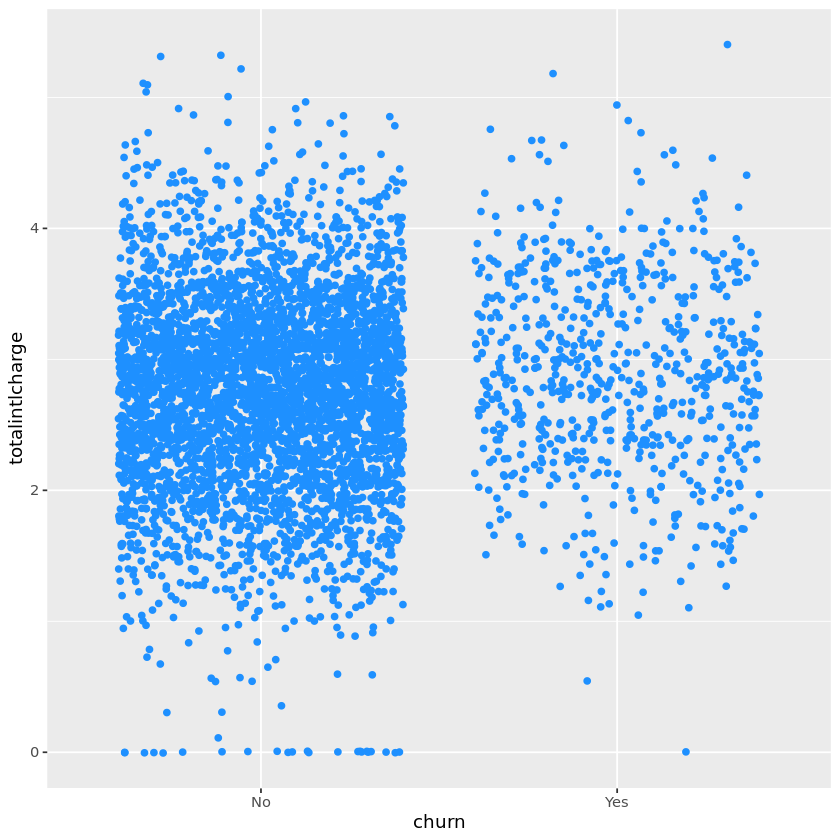

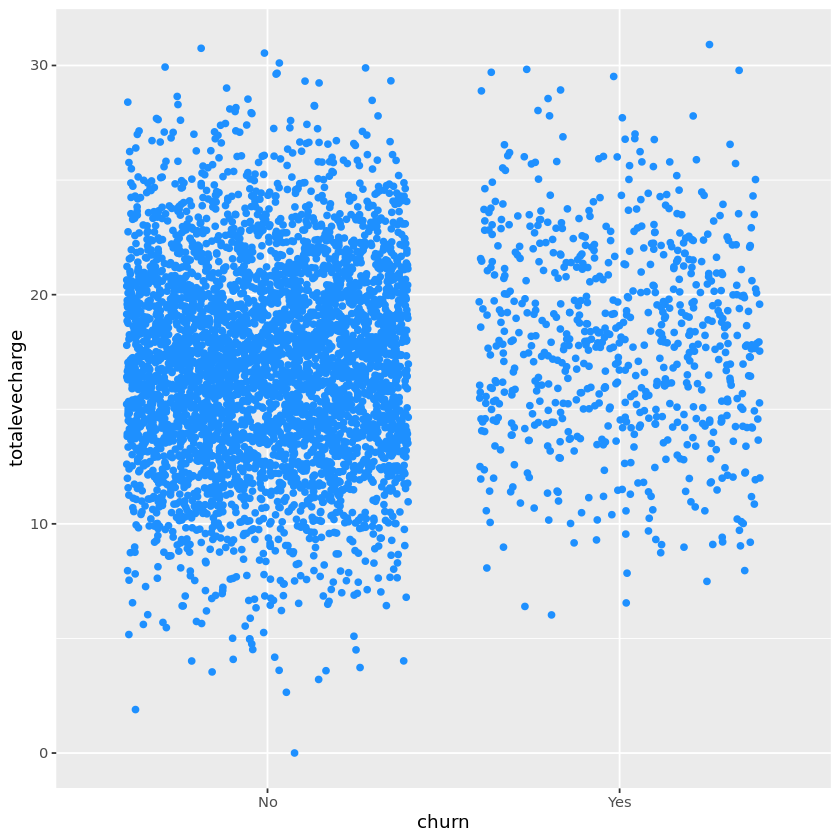

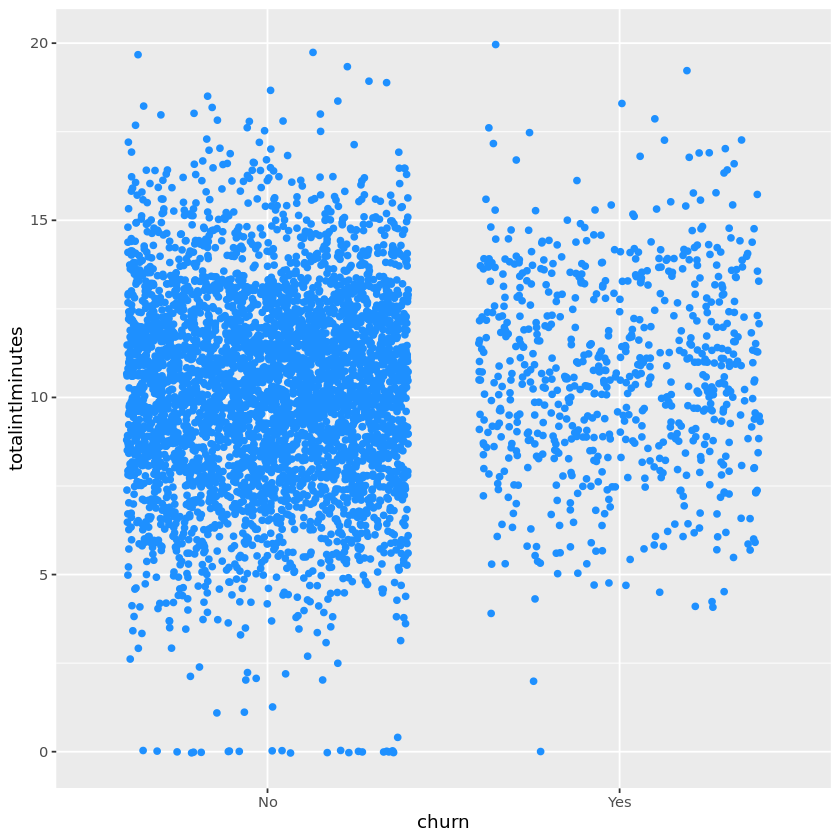

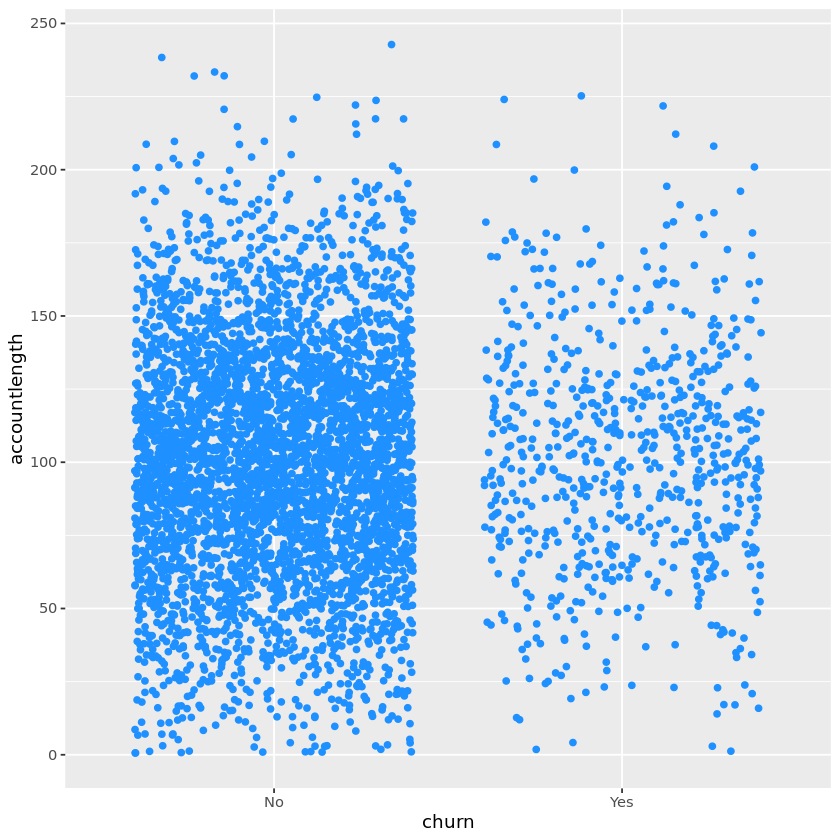

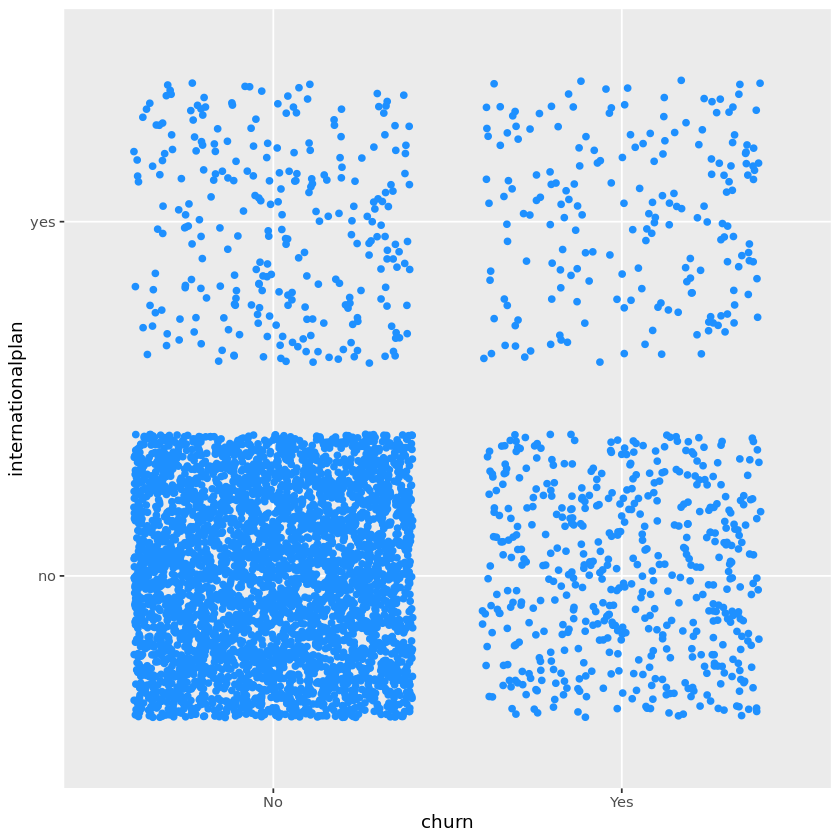

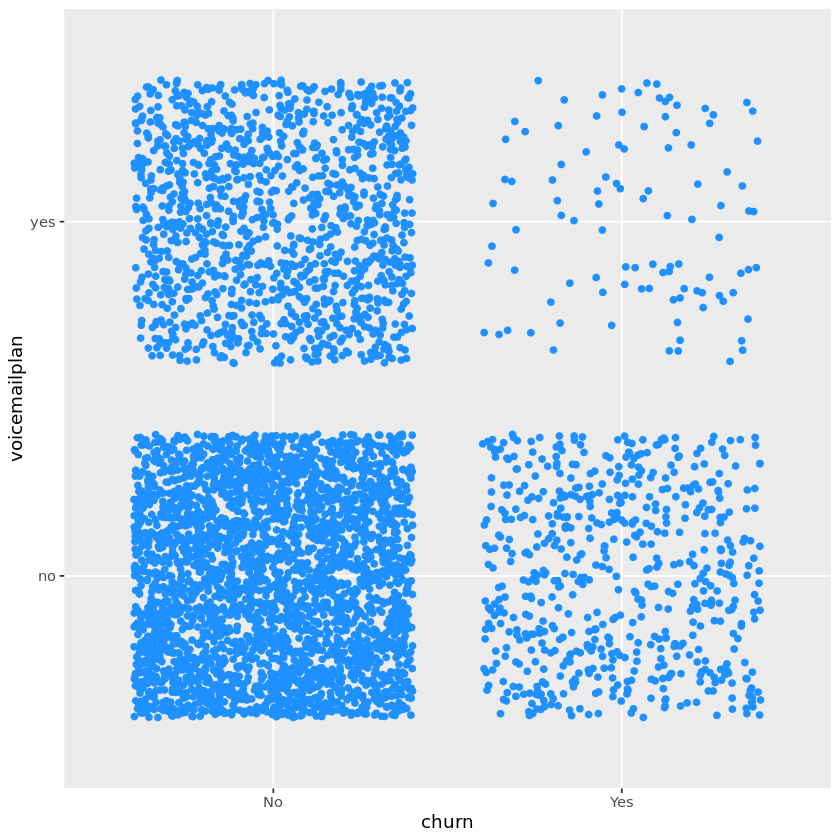

In [20]:
## HW
chur <- read.csv("churn.csv")
chur$churn <- factor(chur$churn)
chur$voicemailplan <- factor(chur$voicemailplan)
chur$internationalplan <- factor(chur$internationalplan)
glimpse(chur)
# explore graph
ggplot(chur, aes(churn,totalintlcharge)) + geom_jitter(color = "dodgerblue")
ggplot(chur, aes(churn,totalevecharge)) + geom_jitter(color = "dodgerblue")
ggplot(chur, aes(churn,totalintlminutes)) + geom_jitter(color = "dodgerblue")
ggplot(chur, aes(churn,accountlength)) + geom_jitter(color = "dodgerblue")
ggplot(chur, aes(churn,internationalplan)) + geom_jitter(color = "dodgerblue")
ggplot(chur, aes(churn,voicemailplan)) + geom_jitter(color = "dodgerblue")


In [21]:
## train test split
n <- nrow(chur)
id <- sample(1:n, size = n*0.8)
train_data <- chur[id, ]
test_data <- chur[-id, ]
glimpse(chur)

Rows: 5,000
Columns: 18
$ churn                      <fct> No, No, No, No, No, No, No, No, No, No, Yes…
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <fct> no, no, no, yes, yes, yes, no, yes, no, yes…
$ voicemailplan              <fct> yes, yes, no, no, no, no, yes, no, no, yes,…
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

In [22]:
## train data
logistic_model <- glm(churn ~ ., data = train_data, family = "binomial")
p_train <- predict(logistic_model, type = "response")
train_data$pred <- if_else(p_train >=0.5, "Yes", "No")
train_m <- table(train_data$pred, train_data$churn, dnn = c("predicted", "actual"))
cat("Accuracy of Train Model: ", (train_m[1,1] + train_m[2,2]) / sum(train_m))
cat("\nPrecission of Train Model: ", train_m[2,2] / (train_m[2,1] + train_m[2,2]))
cat("\nRecall of Train Model: ", train_m[2,2]/ (train_m[1,2] + train_m[2,2]))
cat("\nF1 of Train Model: ", 2* (0.58*0.21)/(0.58+0.21))

Accuracy of Train Model:  0.86725
Precission of Train Model:  0.5817308
Recall of Train Model:  0.2141593
F1 of Train Model:  0.3083544

In [23]:
# test model
p_test <- predict(logistic_model, newdata = test_data, type = "response")
test_data$pred <- if_else(p_test >= 0.5, "Yes", "No")
test_m <- table(test_data$churn, test_data$pred, dnn = c("predicted", "actual"))
cat("Accuracy of Train Model: ", (test_m[1,1] + test_m[2,2]) / sum(test_m))
cat("\nPrecission of Train Model: ", test_m[2,2] / (test_m[2,1] + test_m[2,2]))
cat("\nRecall of Train Model: ", test_m[2,2]/ (test_m[1,2] + test_m[2,2]))
cat("\nF1 of Train Model: ", 2* (0.22*0.55)/(0.22+0.55))

Accuracy of Train Model:  0.864
Precission of Train Model:  0.1830986
Recall of Train Model:  0.5652174
F1 of Train Model:  0.3142857

Rows: 5,000
Columns: 15
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcalls            <int> 91, 103, 104, 89, 121, 118, 118, 96, 90, 97…
$ totalnightcharge           <dbl> 11.01, 11.45, 7.32, 8.86, 8.41, 9.18, 9.57,…
$ totalintlminutes           <dbl> 10.0, 13.7, 12.2, 6.6, 10.1, 6.3, 7.5, 7.1,…
$ totalintlcalls

2492 2508

        real_churn
Clusters   No  Yes
       1 2221  271
       2 2072  436

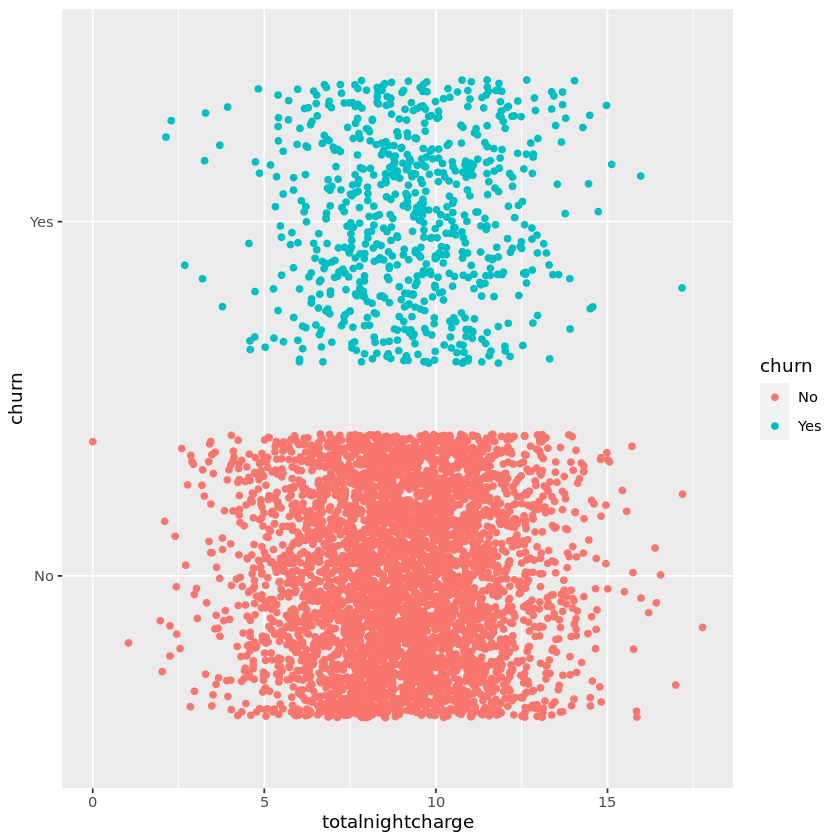

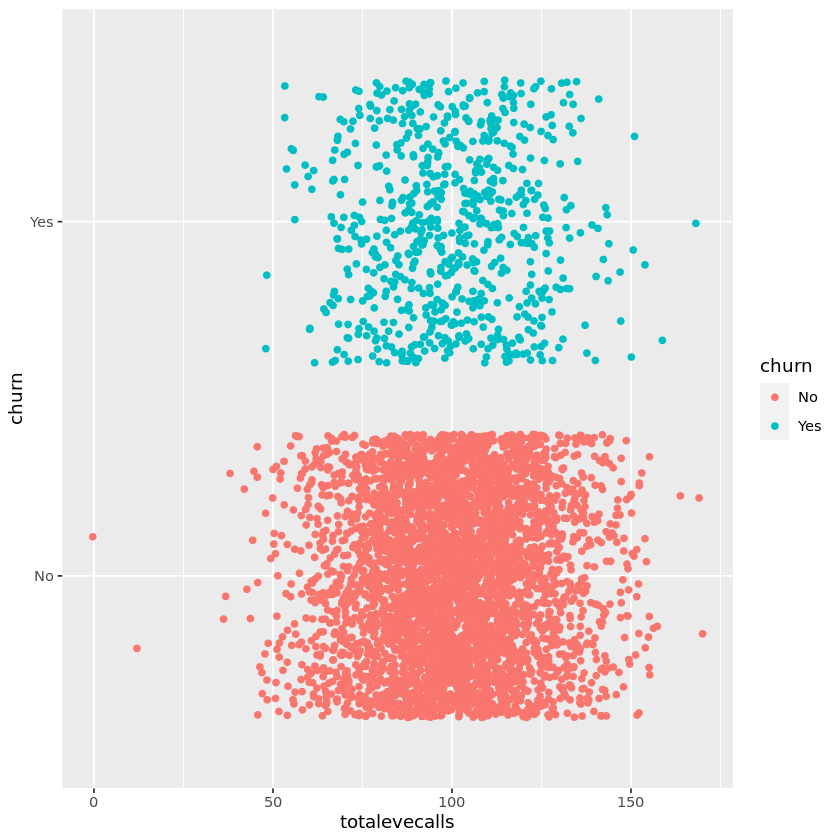

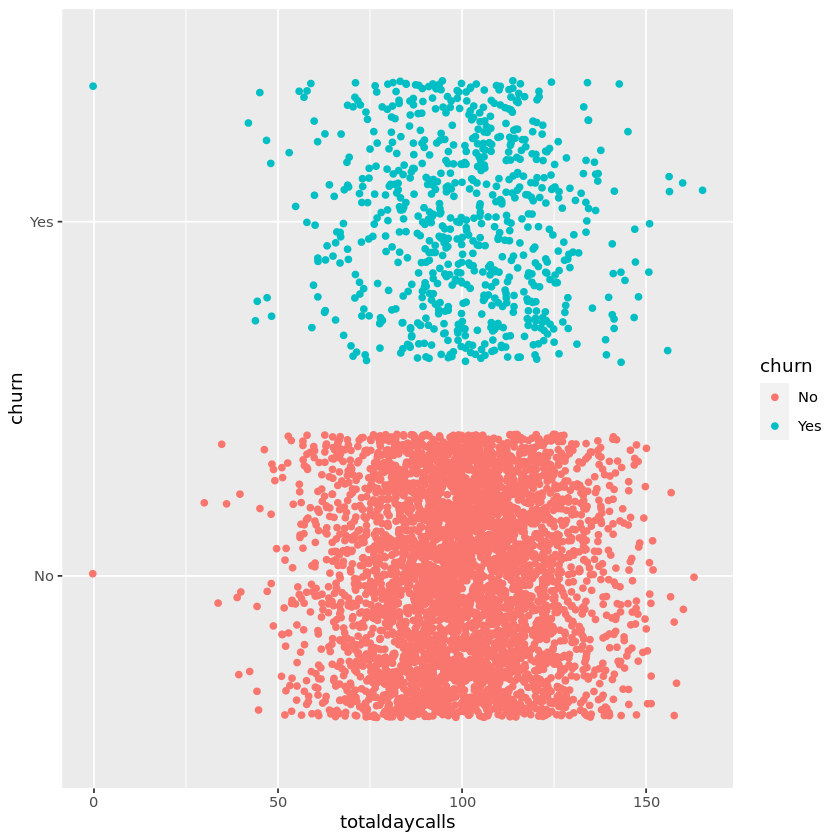

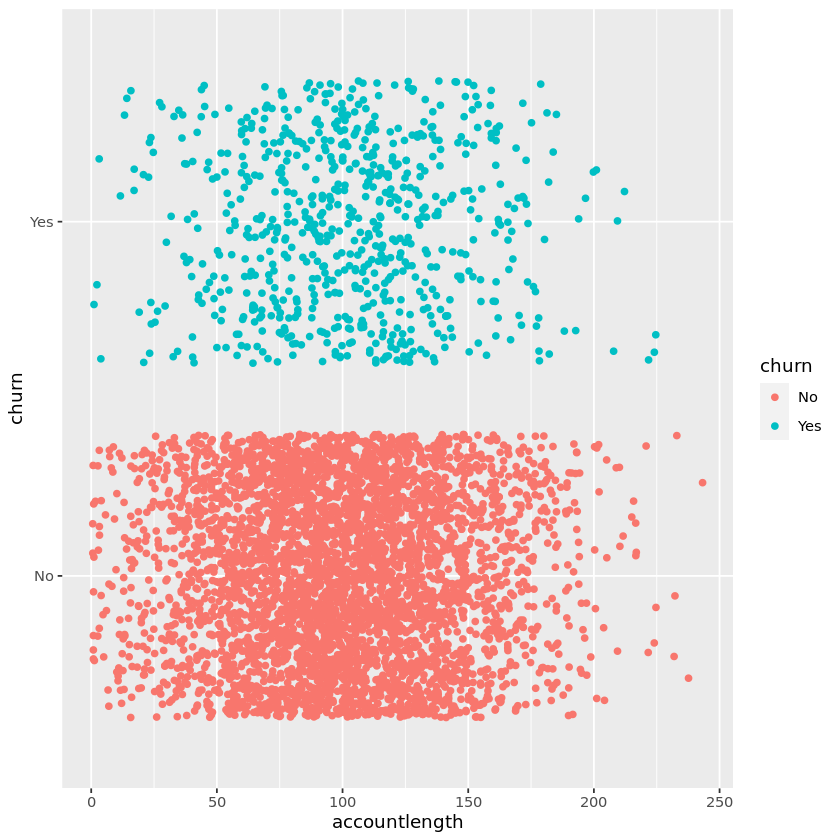

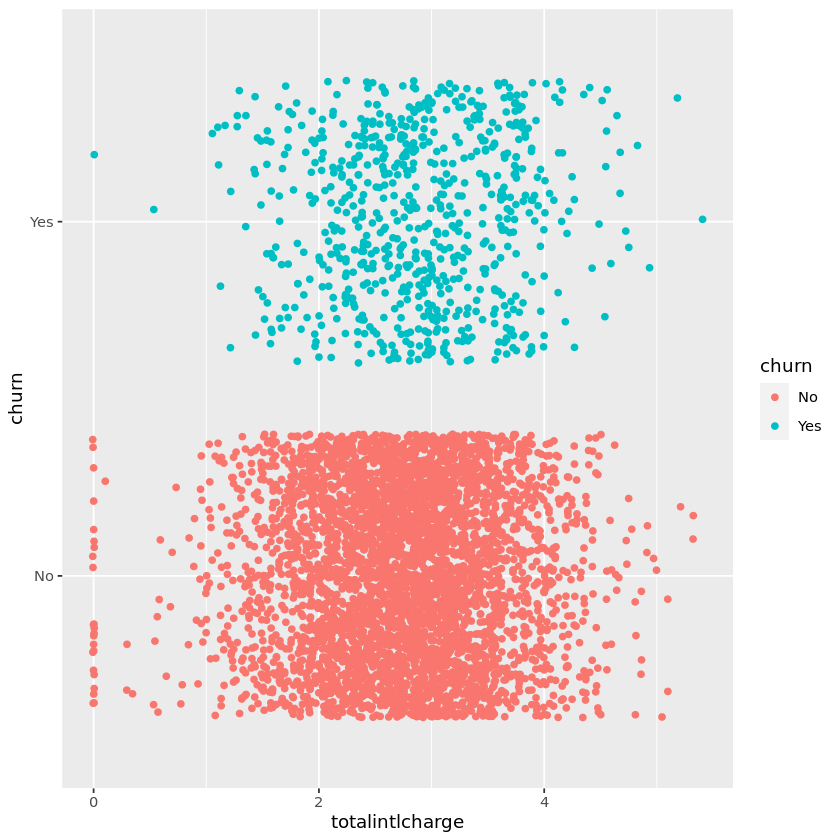

In [24]:
#k-mean
real_churn <- chur$churn
churn_df <- as_tibble(chur)
churn_df <- churn_df %>% select(-churn)
churn_df <- churn_df %>% select(-internationalplan,- voicemailplan)
glimpse(churn_df)

set.seed(42)
km_model <- kmeans(churn_df, centers = 2)
km_model$size
Clusters <-km_model$cluster
table(Clusters,real_churn)

ggplot(chur, aes(totalnightcharge,churn, col = churn)) + geom_jitter()
ggplot(chur, aes(totalevecalls,churn, col = churn)) + geom_jitter()
ggplot(chur, aes(totaldaycalls,churn, col = churn)) + geom_jitter()
ggplot(chur, aes(accountlength,churn, col = churn)) + geom_jitter()
ggplot(chur, aes(totalintlcharge,churn, col = churn)) + geom_jitter()

       